In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('data.csv', index_col=0)
df = df[df['length'] > 0] # If file size is 0, we can't use it to normalize the time
df.head()

,filename,length,tot_time,match_time
id,,,,
1,/QualitasCorpus/QualitasCorpus-20130901r/Syste...,2594,993006,114518
2,/QualitasCorpus/QualitasCorpus-20130901r/Syste...,16154,308841,123467
3,/QualitasCorpus/QualitasCorpus-20130901r/Syste...,11210,190661,14054
4,/QualitasCorpus/QualitasCorpus-20130901r/Syste...,3007,108331,19500
5,/QualitasCorpus/QualitasCorpus-20130901r/Syste...,5641,317723,195798


In [3]:
df['tot_time_normalized'] = df['tot_time']/df['length']
df['match_time_normalized'] = df['match_time']/df['length']
df['tot_match_ratio'] = df['match_time']/df['tot_time']
df.head()

,filename,length,tot_time,match_time,tot_time_normalized,match_time_normalized,tot_match_ratio
id,,,,,,,
1,/QualitasCorpus/QualitasCorpus-20130901r/Syste...,2594,993006,114518,382.808790,44.147263,0.115325
2,/QualitasCorpus/QualitasCorpus-20130901r/Syste...,16154,308841,123467,19.118546,7.643122,0.399775
3,/QualitasCorpus/QualitasCorpus-20130901r/Syste...,11210,190661,14054,17.008118,1.253702,0.073712
4,/QualitasCorpus/QualitasCorpus-20130901r/Syste...,3007,108331,19500,36.026272,6.484869,0.180004
5,/QualitasCorpus/QualitasCorpus-20130901r/Syste...,5641,317723,195798,56.323879,34.709803,0.616254


In [4]:
df.describe()

,length,tot_time,match_time,tot_time_normalized,match_time_normalized,tot_match_ratio
count,2.542100e+04,2.542100e+04,2.542100e+04,25421.000000,25421.000000,25421.000000
mean,7.384580e+03,2.231404e+07,2.221356e+07,7439.334686,7410.972808,0.927714
std,1.550332e+04,1.982289e+08,1.981969e+08,31388.881358,31369.535226,0.111460
min,1.900000e+01,5.176700e+04,1.322300e+04,4.505170,0.321809,0.047350
25%,2.026000e+03,1.146713e+06,1.056906e+06,195.903714,180.324857,0.923280
50%,3.660000e+03,2.278375e+06,2.181062e+06,558.694160,538.638474,0.965764
75%,7.393000e+03,4.838918e+06,4.733387e+06,1603.542563,1574.938190,0.983225
max,1.061384e+06,1.488215e+10,1.487871e+10,946399.327757,946247.785551,0.999923


In [5]:
df_cleaned = df[np.abs(stats.zscore(df['match_time'])) < 3]
df_cleaned = df[np.abs(stats.zscore(df['tot_time'])) < 3]
df_cleaned_2 = df_cleaned[np.abs(stats.zscore(df_cleaned['tot_match_ratio'])) < 3]

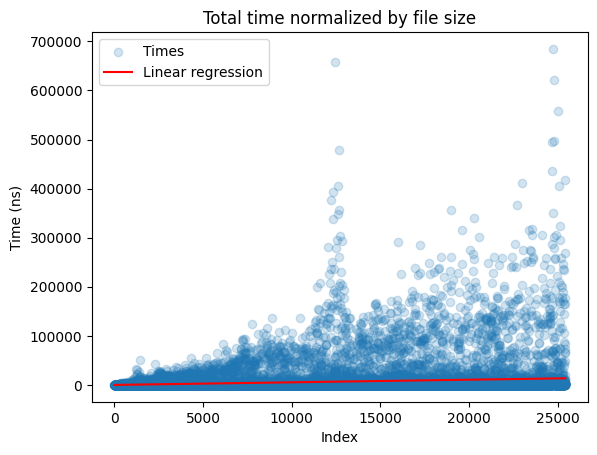

In [6]:
plt.scatter(df_cleaned.index, df_cleaned['tot_time_normalized'], alpha=0.2)
lin_reg = np.polynomial.Polynomial.fit(df_cleaned.index, df_cleaned['tot_time_normalized'], 1)
plt.plot(df_cleaned.index, lin_reg(df_cleaned.index), c='red')
plt.title('Total time normalized by file size')
plt.xlabel('Index')
plt.ylabel('Time (ns)')
plt.legend(['Times', 'Linear regression'])
None

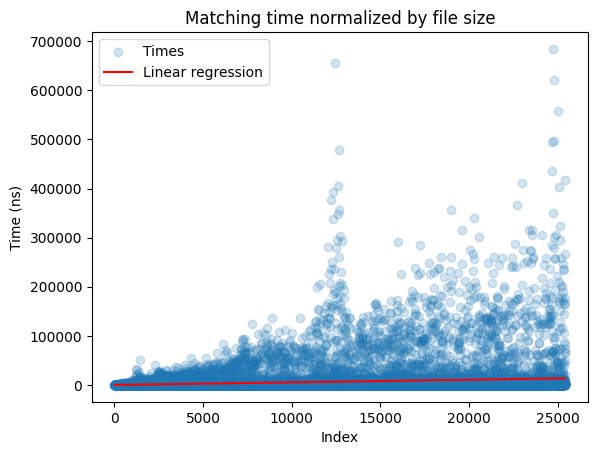

In [7]:
plt.scatter(df_cleaned.index, df_cleaned['match_time_normalized'], alpha=0.2)
reg_fit = np.polynomial.Polynomial.fit(df_cleaned.index, df_cleaned['match_time_normalized'], 1)
plt.plot(df_cleaned.index, reg_fit(df_cleaned.index), c='red')
plt.title('Matching time normalized by file size')
plt.xlabel('Index')
plt.ylabel('Time (ns)')
plt.legend(['Times', 'Linear regression'])
None

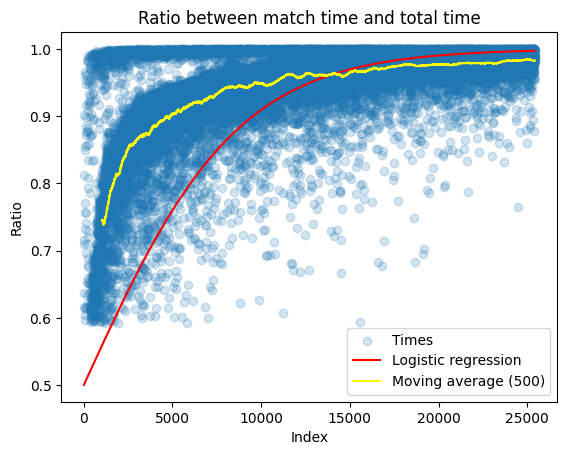

In [8]:
N = 500
transformed = np.log((1 / df_cleaned_2['tot_match_ratio']) - 1)
plt.scatter(df_cleaned_2.index, df_cleaned_2['tot_match_ratio'], alpha=0.2)
lr = LinearRegression(fit_intercept=False).fit(np.reshape(df_cleaned_2.index,(-1, 1)), transformed)
plt.plot(df_cleaned_2.index, 1 / (1 + np.exp(lr.predict(np.reshape(df_cleaned_2.index, (-1, 1))))), c='red')
plt.plot(df_cleaned_2.index[N-1:], np.convolve(df_cleaned_2['tot_match_ratio'], np.ones(N)/N, mode='valid'), c='yellow')
plt.title('Ratio between match time and total time')
plt.xlabel('Index')
plt.ylabel('Ratio')
plt.legend(['Times', 'Logistic regression', f'Moving average ({N})'])
None

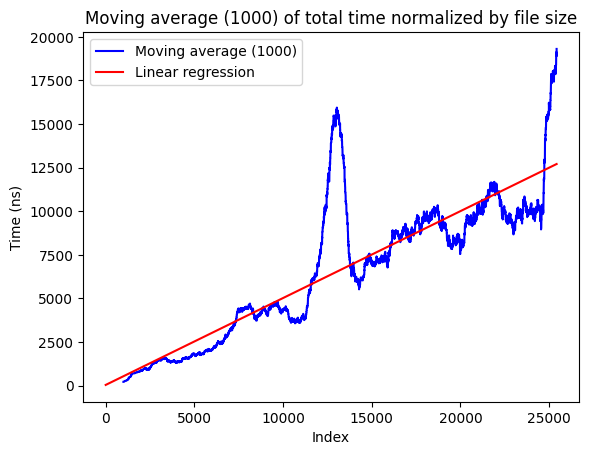

In [9]:
N = 1000
plt.plot(df_cleaned.index[N-1:], np.convolve(df_cleaned['tot_time_normalized'], np.ones(N)/N, mode='valid'), c='blue')
lin_reg = np.polynomial.Polynomial.fit(df_cleaned.index[N-1:], np.convolve(df_cleaned['tot_time_normalized'], np.ones(N)/N, mode='valid'), 1)
plt.plot(df_cleaned.index, lin_reg(df_cleaned.index), c='red')
plt.title(f'Moving average ({N}) of total time normalized by file size')
plt.xlabel('Index')
plt.ylabel('Time (ns)')
plt.legend([f'Moving average ({N})', 'Linear regression'])
None

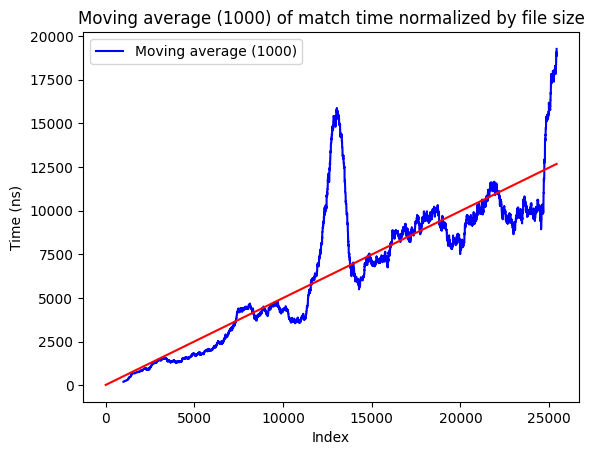

In [10]:
N = 1000
plt.plot(df_cleaned.index[N-1:], np.convolve(df_cleaned['match_time_normalized'], np.ones(N)/N, mode='valid'), c='blue')
lin_reg = np.polynomial.Polynomial.fit(df_cleaned.index[N-1:], np.convolve(df_cleaned['match_time_normalized'], np.ones(N)/N, mode='valid'), 1)
plt.plot(df_cleaned.index, lin_reg(df_cleaned.index), c='red')
plt.title(f'Moving average ({N}) of match time normalized by file size')
plt.xlabel('Index')
plt.ylabel('Time (ns)')
plt.legend([f'Moving average ({N})',])
None

In [11]:
f'{df['length'].sum()/(1024*1024):.2f}MiB'

'179.03MiB'